# Importing the Libraries

### Load necessary libraries for data manipulation, machine learning, visualization, and creating a GUI.

In [12]:
import pandas as pd

# Importing the Dataset

### Read the heart disease dataset from a CSV file into a DataFrame.

In [13]:
data=pd.read_csv('heart.csv')

# Taking care of missing and duplicate values

### Check for and remove duplicate rows in the dataset.


In [14]:
data_dup=data.duplicated().any()

In [15]:
data_dup

True

In [16]:
data=data.drop_duplicates()

In [17]:
data_dup=data.duplicated().any()

In [18]:
data_dup

False

# Data Processing

### Separate columns into categorical and continuous features based on the number of unique values.

In [19]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [20]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [21]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encoding categorical data
### Convert categorical variables into dummy variables, and applies one-hot encoding to the columns listed in cate_val.

In [22]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
data['cp'].unique()

array([0, 1, 2, 3])

In [24]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [25]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Feature scaling

### Standardize continuous features using StandardScaler.

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [29]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Splitting the dataset into the Training set and Test set

In [30]:
X=data.drop('target',axis=1)

In [31]:
Y=data['target']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [34]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


### Train various machine learning models on the training data.

### Predict on the test set and calculate accuracy for each model.

# Logistic Regression

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log=LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [38]:
Y_pred1 = log.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(Y_test,Y_pred1)

0.7868852459016393

# SVC

In [41]:
from sklearn import svm

In [42]:
svm=svm.SVC()

In [43]:
svm.fit(X_train,Y_train)

SVC()

In [44]:
Y_pred2=svm.predict(X_test)

In [45]:
accuracy_score(Y_test,Y_pred2)

0.8032786885245902

# Non-Linear ML algorithm

In [46]:
data=pd.read_csv('heart.csv')

In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [48]:
data=data.drop_duplicates()

In [49]:
data.shape

(302, 14)

In [50]:
X=data.drop('target',axis=1)
Y=data['target']

In [51]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt=DecisionTreeClassifier()

In [54]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [55]:
Y_pred3=dt.predict(X_test)

In [56]:
accuracy_score(Y_test,Y_pred3)

0.7540983606557377

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()

In [59]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
Y_pred4=rf.predict(X_test)

In [61]:
accuracy_score(Y_test,Y_pred4)

0.8524590163934426

## Create a DataFrame with model names and their corresponding accuracies

In [62]:
final_data=pd.DataFrame({'Models':['LR','SVM','DT','RF'],
                         'ACC':[accuracy_score(Y_test,Y_pred1),
                                accuracy_score(Y_test,Y_pred2),
                                accuracy_score(Y_test,Y_pred3),
                                accuracy_score(Y_test,Y_pred4)]})

In [63]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,DT,0.754098
3,RF,0.852459


# by this data frame we can see that Random Forest is the best for our dataset with accuracy around 85%

### Create a DataFrame to compare model accuracies and visualize them with a bar plot..

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

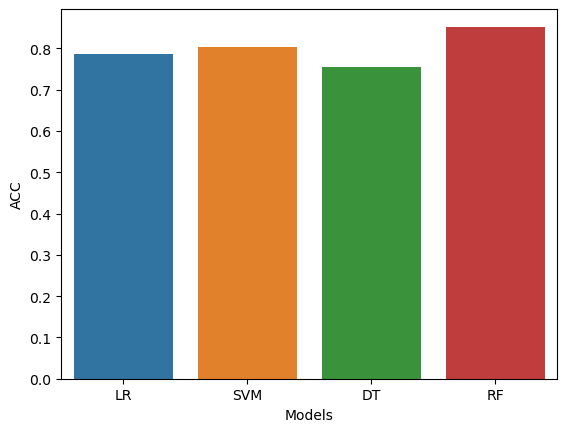

In [65]:
sns.barplot(x='Models',y='ACC',data=final_data)

# as random forest is best model so we retrain the random forest classifier on our entire dataset

In [66]:
X=data.drop('target',axis=1)
Y=data['target']

In [67]:
X.shape

(302, 13)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

# Prediction on new data

In [70]:
import pandas as pd

In [71]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [72]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [73]:
p=rf.predict(new_data)
if p[0]==0:
    print("NO DISEASE")
else:
    print("DISEASE")

NO DISEASE


# Save and Load model using joblib

### Save the trained Random Forest model using joblib.

In [74]:
import joblib

In [75]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [76]:
model=joblib.load('model_joblib_heart')

In [77]:
model.predict(new_data)

array([0])

### Build an interactive GUI with ipywidgets to input new data and predict heart disease using the trained model.

# GUI

In [78]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib

In [79]:
# Load the model
model = joblib.load('model_joblib_heart')

# Create widgets for input fields
age = widgets.IntText(description='Age:')
sex = widgets.IntText(description='Sex (1=M, 0=F):')
cp = widgets.IntText(description='CP:')
trestbps = widgets.IntText(description='Trestbps:')
chol = widgets.IntText(description='Chol:')
fbs = widgets.IntText(description='FBS:')
restecg = widgets.IntText(description='Restecg:')
thalach = widgets.IntText(description='Thalach:')
exang = widgets.IntText(description='Exang:')
oldpeak = widgets.FloatText(description='Oldpeak:')
slope = widgets.IntText(description='Slope:')
ca = widgets.IntText(description='CA:')
thal = widgets.IntText(description='Thal:')

# Create output widget
output = widgets.Output()

# Function to handle prediction
def show_entry_fields(b):
    with output:
        clear_output()
        try:
            p1 = age.value
            p2 = sex.value
            p3 = cp.value
            p4 = trestbps.value
            p5 = chol.value
            p6 = fbs.value
            p7 = restecg.value
            p8 = thalach.value
            p9 = exang.value
            p10 = oldpeak.value
            p11 = slope.value
            p12 = ca.value
            p13 = thal.value

            result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
            
            if result[0] == 0:
                print("NO HEART DISEASE")
            else:
                print("chances of HEART DISEASE")
        except Exception as e:
            print(f"An error occurred: {e}")
            print("Error in prediction")

# Create a button to trigger the prediction
predict_button = widgets.Button(description="PREDICT")
predict_button.on_click(show_entry_fields)

# Display the widgets
display(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, predict_button, output)


IntText(value=0, description='Age:')

IntText(value=0, description='Sex (1=M, 0=F):')

IntText(value=0, description='CP:')

IntText(value=0, description='Trestbps:')

IntText(value=0, description='Chol:')

IntText(value=0, description='FBS:')

IntText(value=0, description='Restecg:')

IntText(value=0, description='Thalach:')

IntText(value=0, description='Exang:')

FloatText(value=0.0, description='Oldpeak:')

IntText(value=0, description='Slope:')

IntText(value=0, description='CA:')

IntText(value=0, description='Thal:')

Button(description='PREDICT', style=ButtonStyle())

Output()